<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/cnn_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, Dropout, GlobalMaxPool1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 12s 32ms/step - loss: 0.6495 - accuracy: 0.5749 - val_loss: 0.3731 - val_accuracy: 0.8345
Epoch 2/100
176/176 [==============================] - 4s 24ms/step - loss: 0.2853 - accuracy: 0.8840 - val_loss: 0.3139 - val_accuracy: 0.8669
Epoch 3/100
176/176 [==============================] - 4s 24ms/step - loss: 0.1502 - accuracy: 0.9488 - val_loss: 0.3502 - val_accuracy: 0.8666
Epoch 4/100
176/176 [==============================] - 4s 24ms/step - loss: 0.0723 - accuracy: 0.9799 - val_loss: 0.3766 - val_accuracy: 0.8727
Epoch 5/100
176/176 [==============================] - 4s 25ms/step - loss: 0.0372 - accuracy: 0.9907 - val_loss: 0.4774 - val_accuracy: 0.8686
Epoch 6/100
176/176 [==============================] - 4s 25ms/step - loss: 0.0117 - accuracy: 0.9975 - val_loss: 0.5646 - val_accuracy: 0.8716
Epoch 7/100
176/176 [==============================] - 4s 24ms/step - loss: 0.0061 - accuracy: 0.9987 - val_loss: 0.68

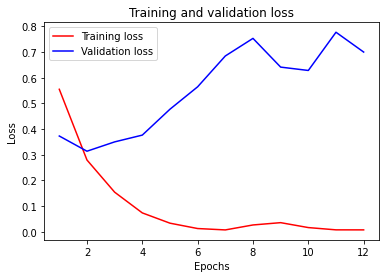

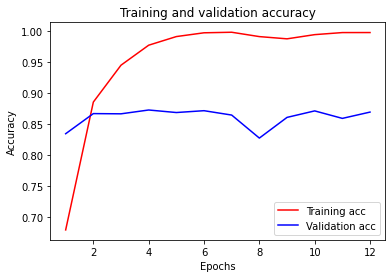

              precision    recall  f1-score   support

           0      0.915     0.810     0.859     12500
           1      0.829     0.924     0.874     12500

    accuracy                          0.867     25000
   macro avg      0.872     0.867     0.866     25000
weighted avg      0.872     0.867     0.866     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 6s 29ms/step - loss: 0.6432 - accuracy: 0.5879 - val_loss: 0.3529 - val_accuracy: 0.8478
Epoch 2/100
176/176 [==============================] - 5s 28ms/step - loss: 0.2774 - accuracy: 0.8873 - val_loss: 0.2932 - val_accuracy: 0.8771
Epoch 3/100
176/176 [==============================] - 5s 29ms/step - loss: 0.1282 - accuracy: 0.9586 - val_loss: 0.3239 - val_accuracy: 0.8788
Epoch 4/100
176/176 [==============================] - 5s 28ms/step - loss: 0.0517 - accuracy: 0.9862 - val_loss: 0.3892 - val_accuracy: 0.8710
Epoch 5/100
176/176 [==============================] - 5s 29ms/step - loss: 0.0

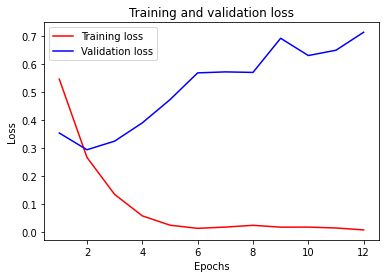

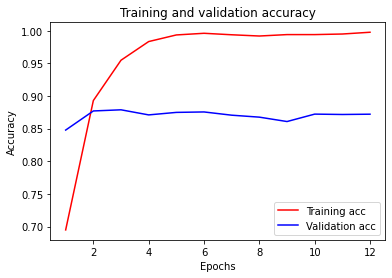

              precision    recall  f1-score   support

           0      0.866     0.892     0.879     12500
           1      0.889     0.862     0.875     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 6s 30ms/step - loss: 0.6607 - accuracy: 0.5565 - val_loss: 0.3533 - val_accuracy: 0.8428
Epoch 2/100
176/176 [==============================] - 5s 29ms/step - loss: 0.2912 - accuracy: 0.8791 - val_loss: 0.2912 - val_accuracy: 0.8780
Epoch 3/100
176/176 [==============================] - 5s 29ms/step - loss: 0.1421 - accuracy: 0.9522 - val_loss: 0.3360 - val_accuracy: 0.8681
Epoch 4/100
176/176 [==============================] - 5s 29ms/step - loss: 0.0618 - accuracy: 0.9823 - val_loss: 0.4402 - val_accuracy: 0.8556
Epoch 5/100
176/176 [==============================] - 5s 28ms/step - loss: 0.0

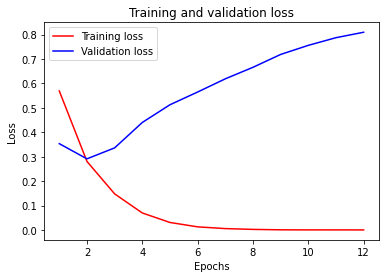

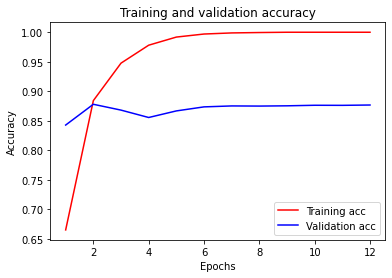

              precision    recall  f1-score   support

           0      0.901     0.850     0.874     12500
           1      0.858     0.906     0.881     12500

    accuracy                          0.878     25000
   macro avg      0.879     0.878     0.878     25000
weighted avg      0.879     0.878     0.878     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 6s 30ms/step - loss: 0.6326 - accuracy: 0.5964 - val_loss: 0.3449 - val_accuracy: 0.8480
Epoch 2/100
176/176 [==============================] - 5s 29ms/step - loss: 0.2716 - accuracy: 0.8911 - val_loss: 0.2779 - val_accuracy: 0.8857
Epoch 3/100
176/176 [==============================] - 5s 29ms/step - loss: 0.1274 - accuracy: 0.9579 - val_loss: 0.3058 - val_accuracy: 0.8820
Epoch 4/100
176/176 [==============================] - 5s 29ms/step - loss: 0.0513 - accuracy: 0.9854 - val_loss: 0.4364 - val_accuracy: 0.8594
Epoch 5/100
176/176 [==============================] - 5s 29ms/step - loss: 0.0

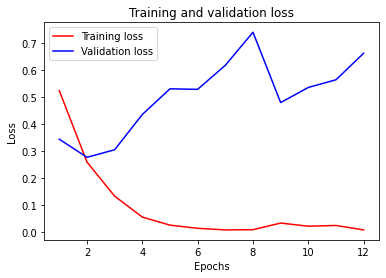

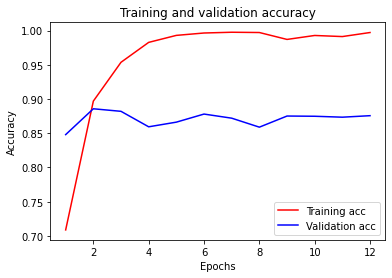

              precision    recall  f1-score   support

           0      0.885     0.887     0.886     12500
           1      0.887     0.884     0.886     12500

    accuracy                          0.886     25000
   macro avg      0.886     0.886     0.886     25000
weighted avg      0.886     0.886     0.886     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 7s 33ms/step - loss: 0.6689 - accuracy: 0.5382 - val_loss: 0.3437 - val_accuracy: 0.8510
Epoch 2/100
176/176 [==============================] - 5s 29ms/step - loss: 0.2743 - accuracy: 0.8934 - val_loss: 0.2929 - val_accuracy: 0.8764
Epoch 3/100
176/176 [==============================] - 5s 29ms/step - loss: 0.1313 - accuracy: 0.9555 - val_loss: 0.3229 - val_accuracy: 0.8764
Epoch 4/100
176/176 [==============================] - 5s 29ms/step - loss: 0.0596 - accuracy: 0.9834 - val_loss: 0.5229 - val_accuracy: 0.8517
Epoch 5/100
176/176 [==============================] - 5s 29ms/step - loss: 0.0

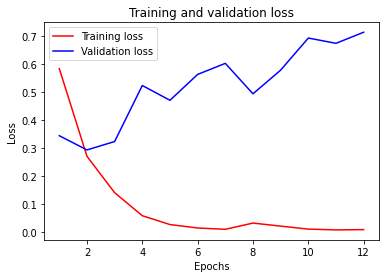

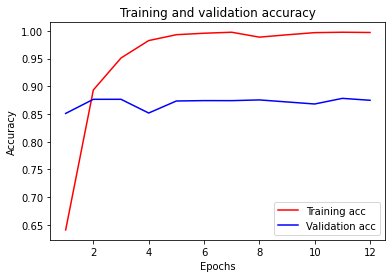

              precision    recall  f1-score   support

           0      0.902     0.844     0.872     12500
           1      0.854     0.909     0.880     12500

    accuracy                          0.876     25000
   macro avg      0.878     0.876     0.876     25000
weighted avg      0.878     0.876     0.876     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 6s 31ms/step - loss: 0.6524 - accuracy: 0.5609 - val_loss: 0.3242 - val_accuracy: 0.8609
Epoch 2/100
176/176 [==============================] - 5s 30ms/step - loss: 0.2696 - accuracy: 0.8902 - val_loss: 0.2958 - val_accuracy: 0.8755
Epoch 3/100
176/176 [==============================] - 5s 30ms/step - loss: 0.1359 - accuracy: 0.9547 - val_loss: 0.3179 - val_accuracy: 0.8769
Epoch 4/100
176/176 [==============================] - 5s 29ms/step - loss: 0.0557 - accuracy: 0.9852 - val_loss: 0.3676 - val_accuracy: 0.8789
Epoch 5/100
176/176 [==============================] - 5s 29ms/step - loss: 0.0

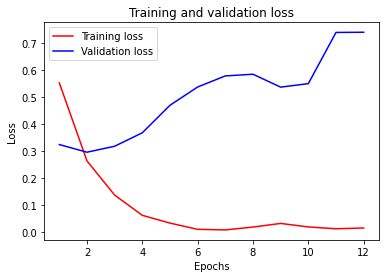

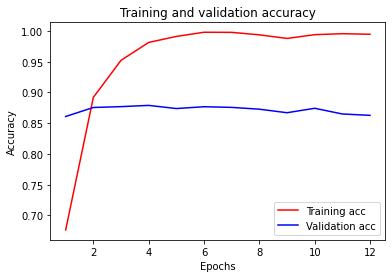

              precision    recall  f1-score   support

           0      0.845     0.920     0.881     12500
           1      0.913     0.831     0.870     12500

    accuracy                          0.876     25000
   macro avg      0.879     0.876     0.875     25000
weighted avg      0.879     0.876     0.875     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 6s 31ms/step - loss: 0.6442 - accuracy: 0.5820 - val_loss: 0.3610 - val_accuracy: 0.8422
Epoch 2/100
176/176 [==============================] - 5s 30ms/step - loss: 0.2712 - accuracy: 0.8924 - val_loss: 0.3172 - val_accuracy: 0.8666
Epoch 3/100
176/176 [==============================] - 5s 30ms/step - loss: 0.1387 - accuracy: 0.9530 - val_loss: 0.3293 - val_accuracy: 0.8727
Epoch 4/100
176/176 [==============================] - 5s 30ms/step - loss: 0.0590 - accuracy: 0.9829 - val_loss: 0.3795 - val_accuracy: 0.8734
Epoch 5/100
176/176 [==============================] - 5s 29ms/step - loss: 0.0

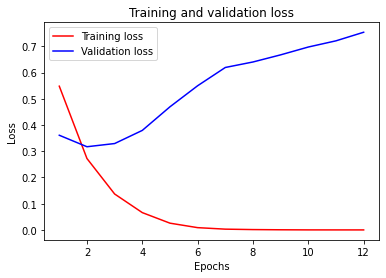

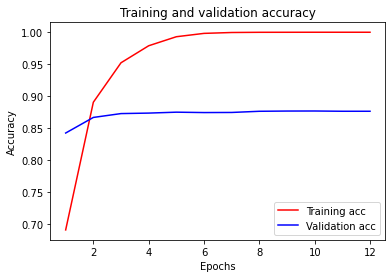

              precision    recall  f1-score   support

           0      0.927     0.796     0.857     12500
           1      0.821     0.937     0.875     12500

    accuracy                          0.867     25000
   macro avg      0.874     0.867     0.866     25000
weighted avg      0.874     0.867     0.866     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 6s 31ms/step - loss: 0.6374 - accuracy: 0.5954 - val_loss: 0.3390 - val_accuracy: 0.8518
Epoch 2/100
176/176 [==============================] - 5s 30ms/step - loss: 0.2634 - accuracy: 0.8938 - val_loss: 0.2916 - val_accuracy: 0.8786
Epoch 3/100
176/176 [==============================] - 5s 30ms/step - loss: 0.1333 - accuracy: 0.9558 - val_loss: 0.3256 - val_accuracy: 0.8773
Epoch 4/100
176/176 [==============================] - 5s 30ms/step - loss: 0.0575 - accuracy: 0.9838 - val_loss: 0.3959 - val_accuracy: 0.8732
Epoch 5/100
176/176 [==============================] - 5s 29ms/step - loss: 0.0

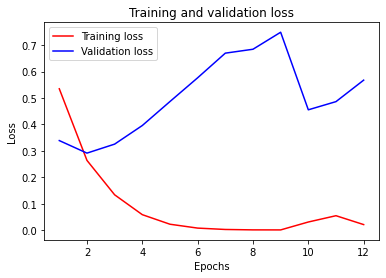

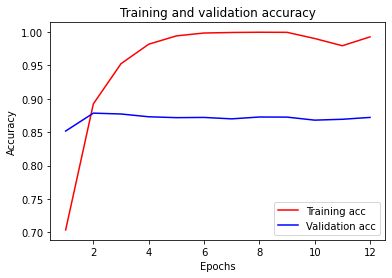

              precision    recall  f1-score   support

           0      0.887     0.867     0.877     12500
           1      0.870     0.890     0.880     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 6s 31ms/step - loss: 0.6580 - accuracy: 0.5578 - val_loss: 0.3491 - val_accuracy: 0.8456
Epoch 2/100
176/176 [==============================] - 5s 30ms/step - loss: 0.2759 - accuracy: 0.8924 - val_loss: 0.2895 - val_accuracy: 0.8793
Epoch 3/100
176/176 [==============================] - 5s 29ms/step - loss: 0.1356 - accuracy: 0.9569 - val_loss: 0.3254 - val_accuracy: 0.8795
Epoch 4/100
176/176 [==============================] - 5s 29ms/step - loss: 0.0617 - accuracy: 0.9839 - val_loss: 0.3858 - val_accuracy: 0.8760
Epoch 5/100
176/176 [==============================] - 5s 30ms/step - loss: 0.0

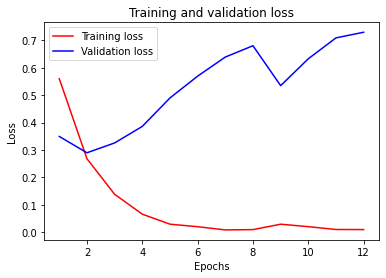

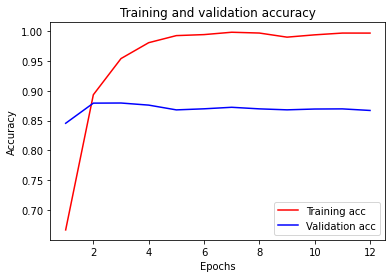

              precision    recall  f1-score   support

           0      0.883     0.874     0.879     12500
           1      0.875     0.885     0.880     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 6s 31ms/step - loss: 0.6521 - accuracy: 0.5712 - val_loss: 0.3352 - val_accuracy: 0.8566
Epoch 2/100
176/176 [==============================] - 5s 30ms/step - loss: 0.2678 - accuracy: 0.8912 - val_loss: 0.2979 - val_accuracy: 0.8739
Epoch 3/100
176/176 [==============================] - 5s 31ms/step - loss: 0.1261 - accuracy: 0.9600 - val_loss: 0.3372 - val_accuracy: 0.8690
Epoch 4/100
176/176 [==============================] - 5s 30ms/step - loss: 0.0557 - accuracy: 0.9847 - val_loss: 0.3950 - val_accuracy: 0.8752
Epoch 5/100
176/176 [==============================] - 5s 30ms/step - loss: 0.

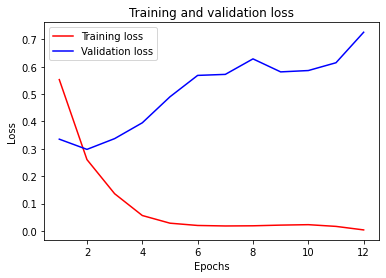

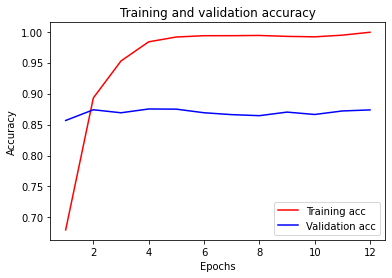

              precision    recall  f1-score   support

           0      0.887     0.857     0.872     12500
           1      0.862     0.891     0.876     12500

    accuracy                          0.874     25000
   macro avg      0.874     0.874     0.874     25000
weighted avg      0.874     0.874     0.874     25000


Average accuracy: 0.8753 (+/- 0.0043)
Average loss: 0.2992 (+/- 0.0127)
Average F1: 0.8778 (+/- 0.0043)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []
n = 1
for train, valid in kfold.split(x_train, y_train):

  print("KFold: {} starts.".format(n))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    MaxPool1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    GlobalMaxPool1D(),
    Flatten(),
    # Hidden layers
    Dense(units=250, activation="relu"),
    Dropout(rate=0.2, noise_shape=None, seed=None),
    Dense(units=250, activation="relu"),
    Dropout(rate=0.2, noise_shape=None, seed=None),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_valid, y_valid),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_train[valid], y=y_train[valid], verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_valid, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")
  n += 1

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
